In [4]:
from gym import make
from agent import Agent
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
sns.set()

In [5]:
def plot(log):
    fig, ax = plt.subplots(figsize=(12, 8))
    cfg = (f'alpha: {log["alpha"][0]} | '
           f'gamma: {log["gamma"][0]} | '
           f'eps: {log["eps_max"][0]}, {log["eps_min"][0]} | '
           f'buffer: {log["buffer_size"][0]} | '
           f'batch: {log["batch_size"][0]} | '
           f'tau: {log["tau"][0]}')
    ax.set_title(f"Mean reward over 10 episodes @ {cfg}")
    ax.set_xlabel("№ of transitions")
    ax.set_ylabel("Mean reward")

    plt.hlines(-110, np.min(log["step"]), np.max(log["step"]),
               colors="r", label="Solved")

    plt.plot(log["step"],
             log["reward_mean"],
             label="DQN")

    plt.fill_between(log["step"],
                     log["reward_mean"] - log["reward_std"],
                     log["reward_mean"] + log["reward_std"], alpha=0.5)
    plt.legend()
    plt.show()

def collect_data(alpha, gamma, eps_max, eps_min,
                 start_training,
                 buffer_size,
                 batch_size,
                 hidden_size,
                 shaping,
                 tau):
    env = make("MountainCar-v0")
    agent = Agent(env,
                  alpha=alpha,
                  gamma=gamma,
                  hidden_size=hidden_size,
                  tau=tau)
    return agent, pd.DataFrame(agent.train(200_000,
                                           buffer_size=buffer_size,
                                           batch_size=batch_size,
                                           eps_max=eps_max,
                                           eps_min=eps_min,
                                           shaping_coef=shaping,
                                           start_training=start_training
                                           ))

def print_info(log):
    r_max_idx = np.argmax(log["reward_mean"])
    print(f"Max mean reward {log['reward_mean'][r_max_idx]} @ {log['step'][r_max_idx]}")

In [3]:
configs = []

for buffer_size in (5000, 10000, 50000, 100000):
    for batch_size in (16, 32, 64, 128, 256):
        for tau in (1e-3, 1e-2, 1e-1, 0.2):
            configs.append(
                {
                    "alpha": 1e-3,
                    "gamma": 0.99,
                    "buffer_size": buffer_size,
                    "batch_size": batch_size,
                    "start_training": 1000,
                    "eps_max": 0.1,
                    "eps_min": 0.,
                    "hidden_size": 32,
                    "shaping": 300,
                    "tau": tau
                }
            )


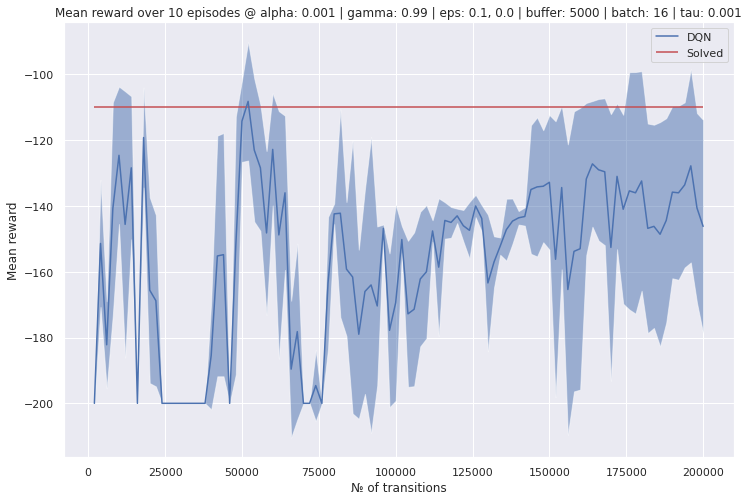

(-134.18, 30.558592899543)
Max reward -108.2 @ 51999
(-191.88, 17.824859045725997)
Max reward -125.0 @ 29999
(-200.0, 0.0)
Max reward -104.2 @ 131999
(-200.0, 0.0)
Max reward -133.6 @ 179999
(-136.26, 18.73105442840845)
Max reward -105.2 @ 171999
(-136.46, 38.401151024415924)
Max reward -114.2 @ 61999
(-200.0, 0.0)
Max reward -164.0 @ 53999
(-200.0, 0.0)
Max reward -189.2 @ 159999
(-125.08, 19.86941368032786)
Max reward -100.8 @ 63999
(-200.0, 0.0)
Max reward -107.6 @ 133999
(-141.28, 35.592999311662396)
Max reward -123.2 @ 73999
(-134.3, 40.88557202730567)
Max reward -128.4 @ 193999
(-123.34, 26.924420142316905)
Max reward -100.8 @ 53999
(-146.46, 31.7689848751892)
Max reward -99.8 @ 157999
(-102.71, 17.04129983305264)
Max reward -99.2 @ 171999
(-200.0, 0.0)
Max reward -102.6 @ 75999
(-117.3, 23.279819586929793)
Max reward -101.0 @ 51999
(-130.87, 21.886824803977394)
Max reward -102.0 @ 85999
(-154.83, 21.35371396268106)
Max reward -99.6 @ 73999
(-140.55, 32.81779243032657)
Max reward

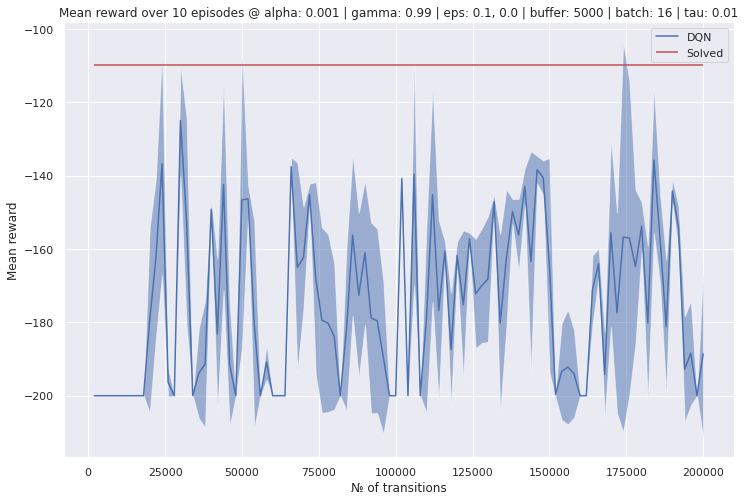

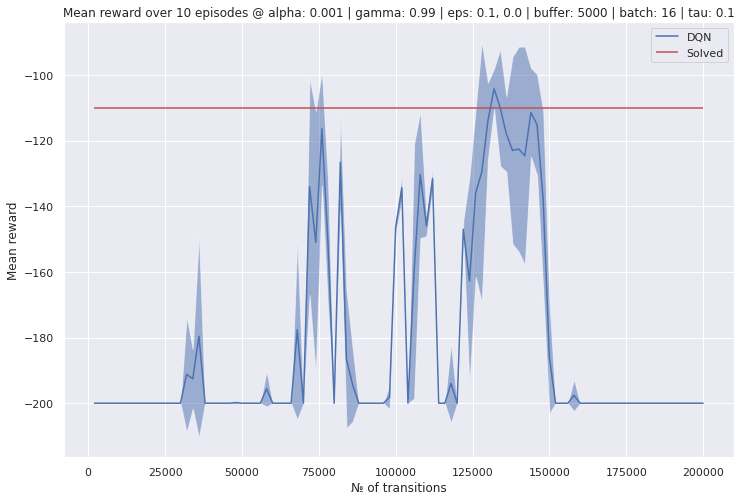

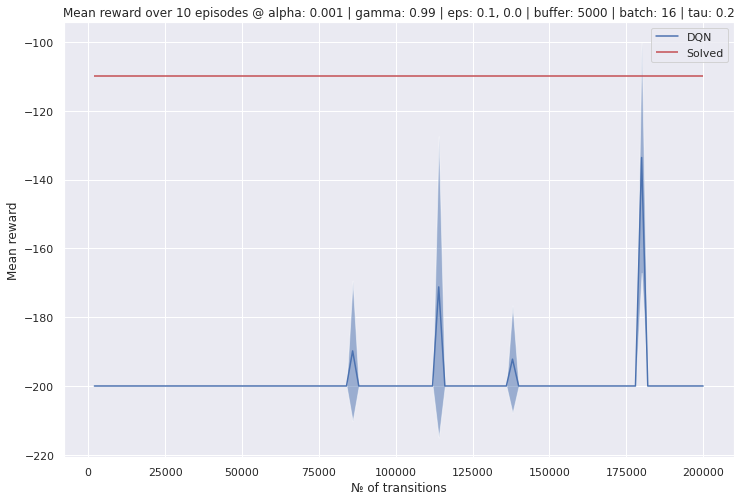

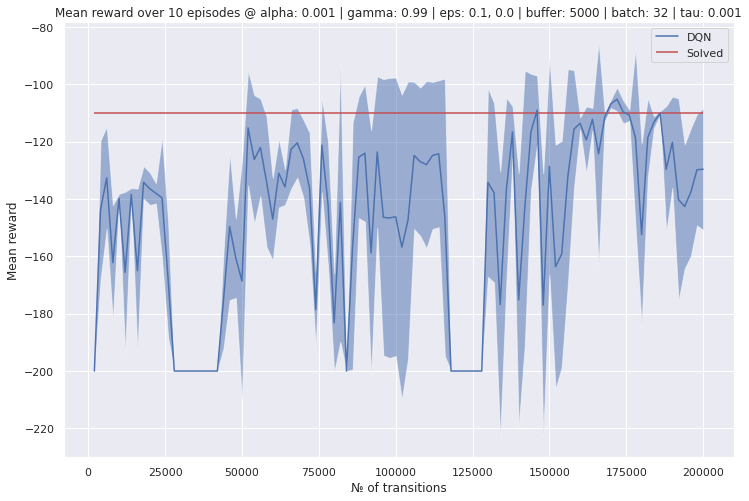

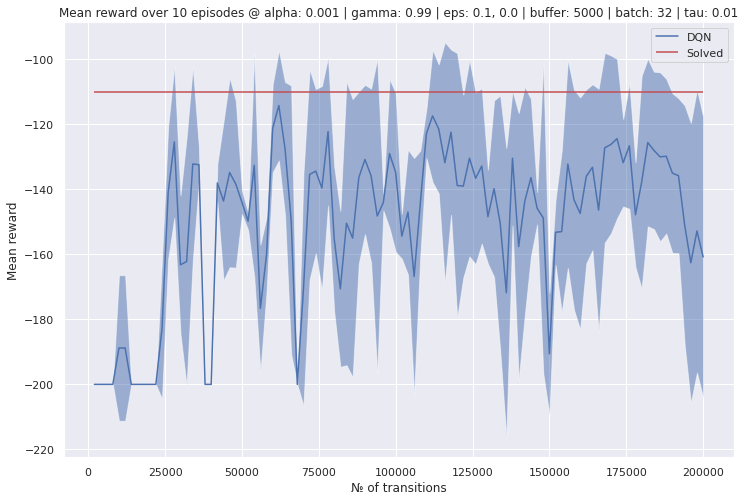

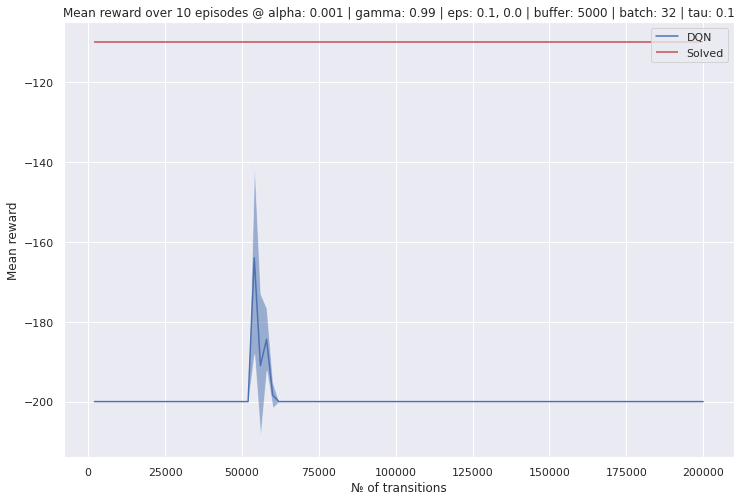

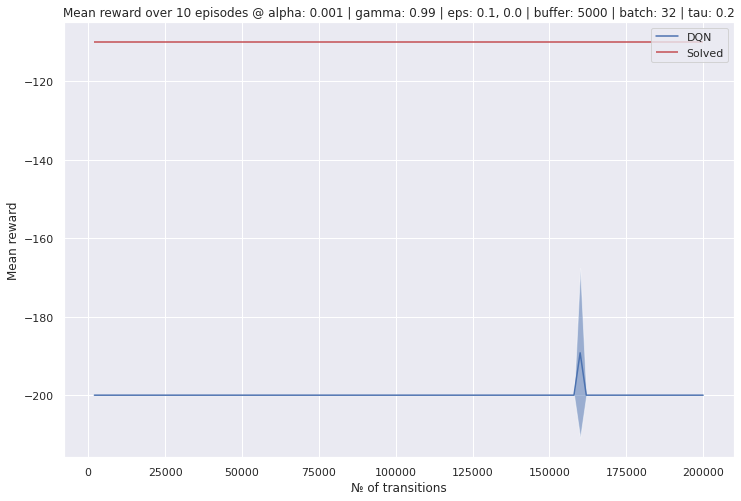

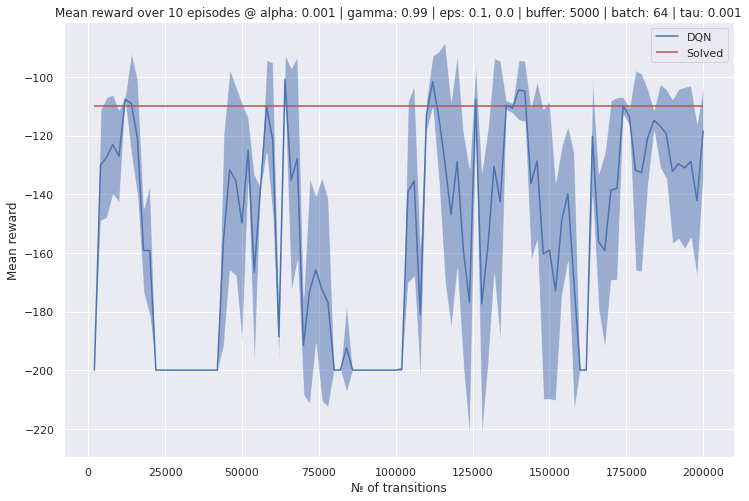

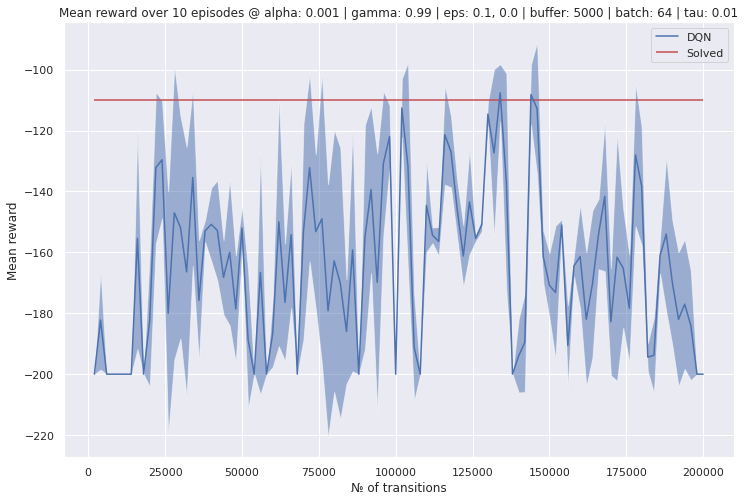

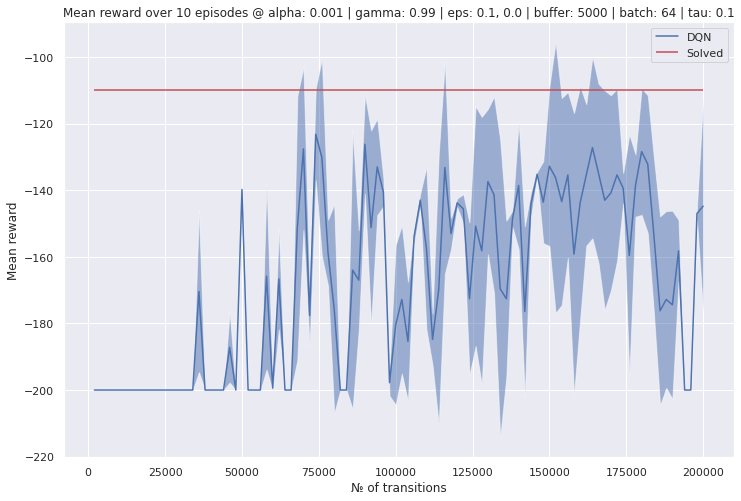

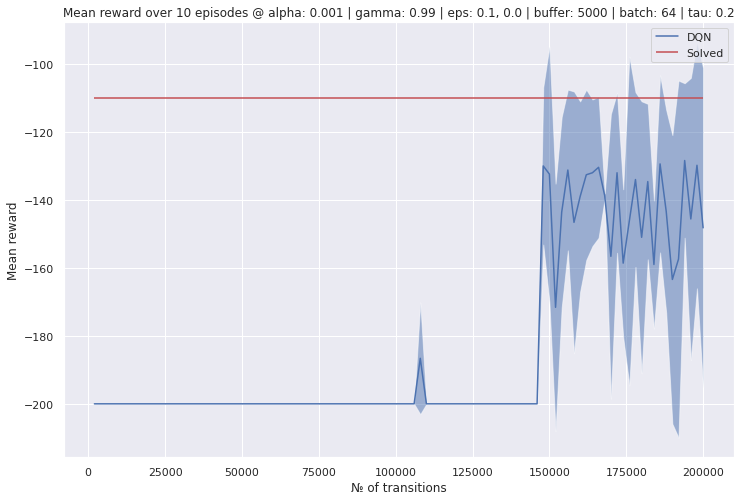

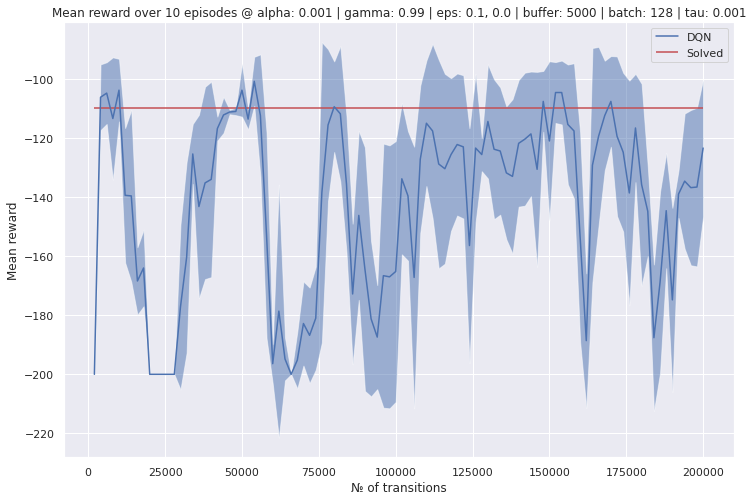

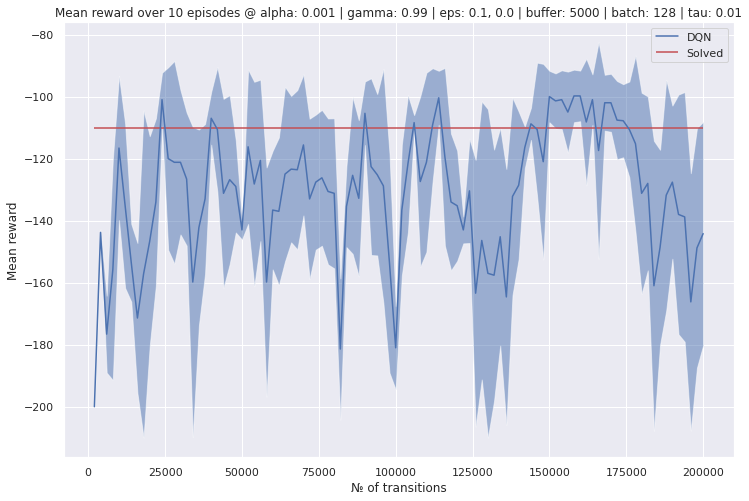

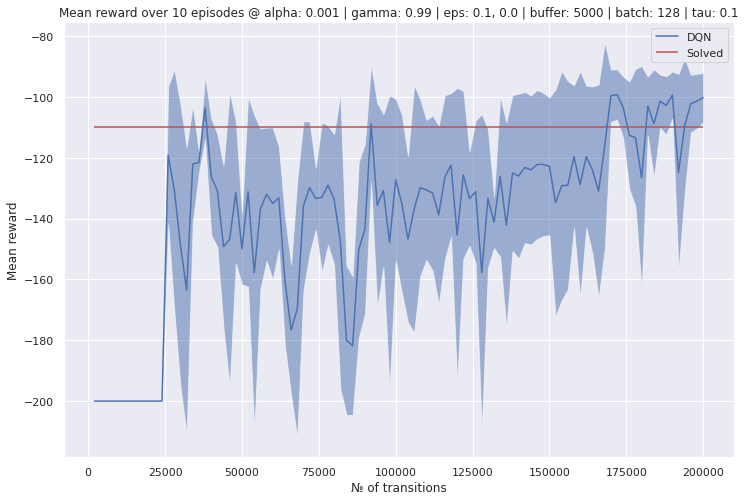

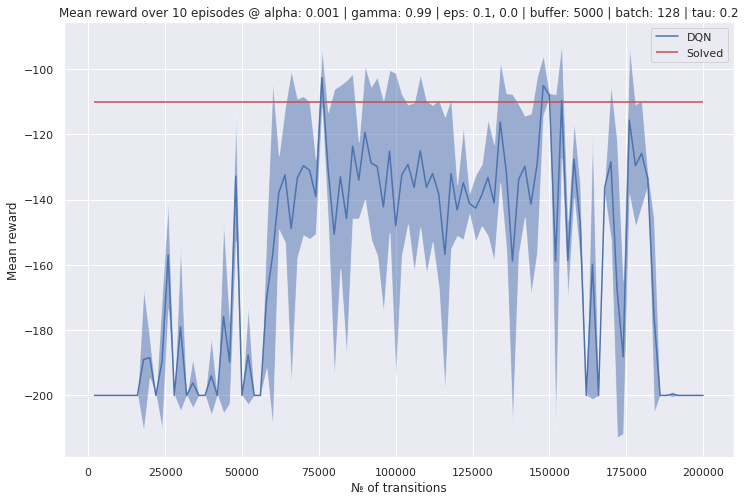

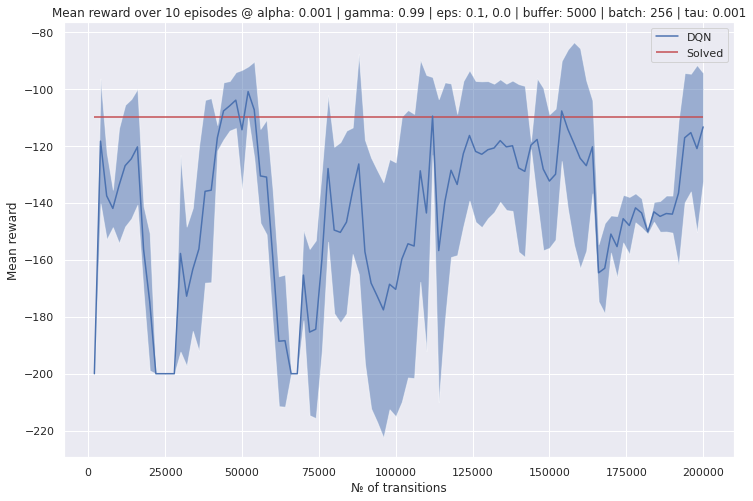

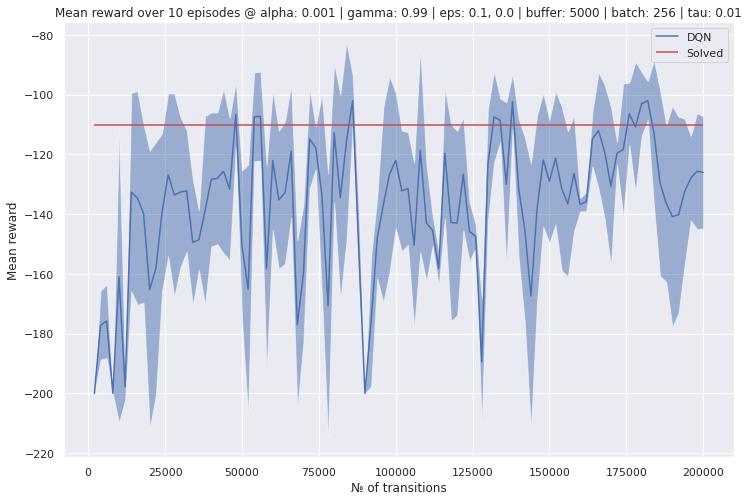

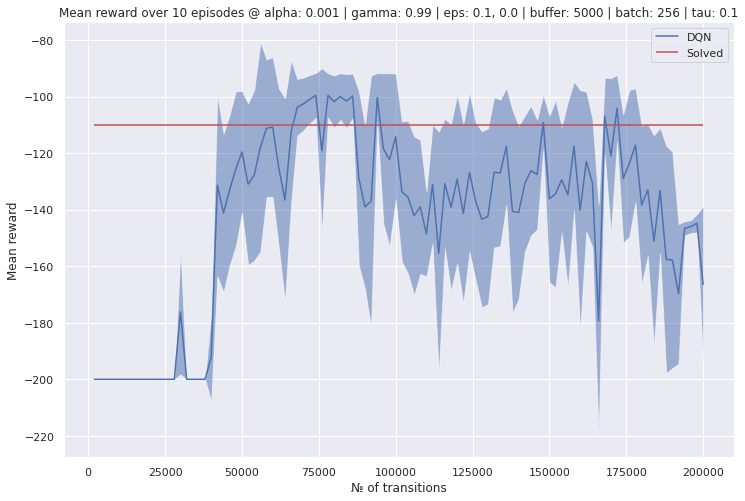

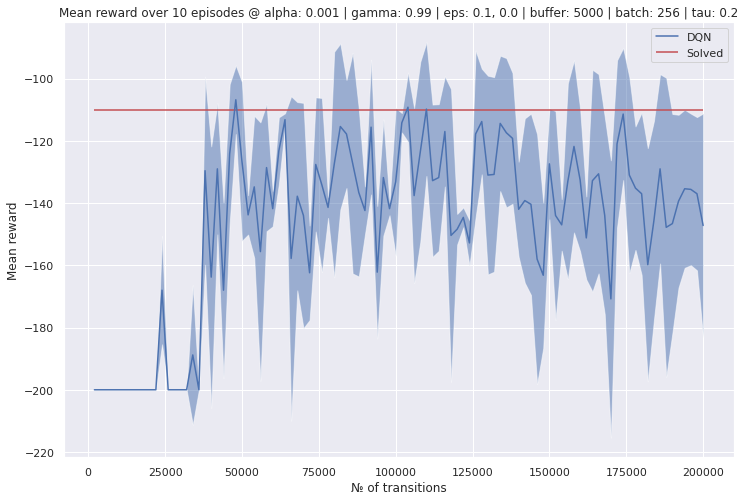

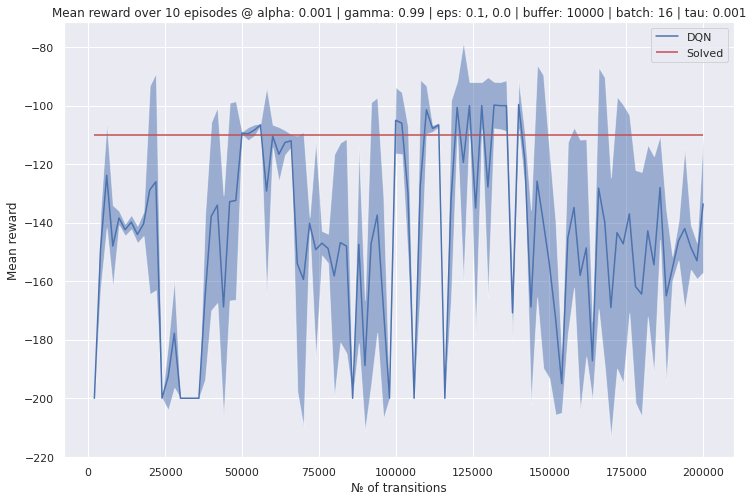

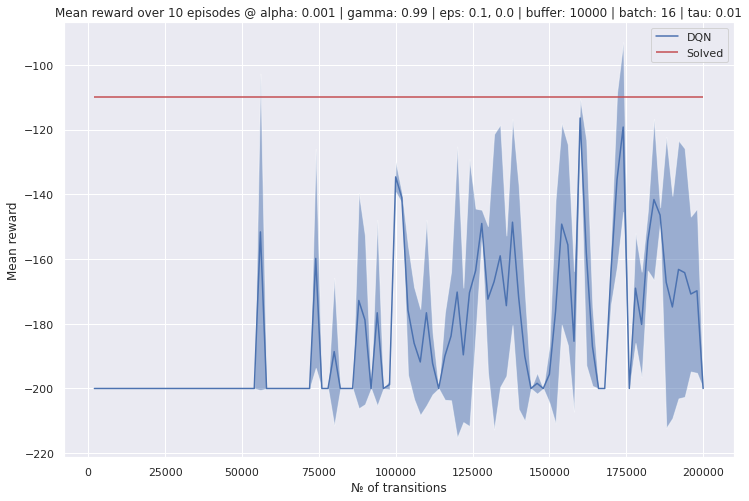

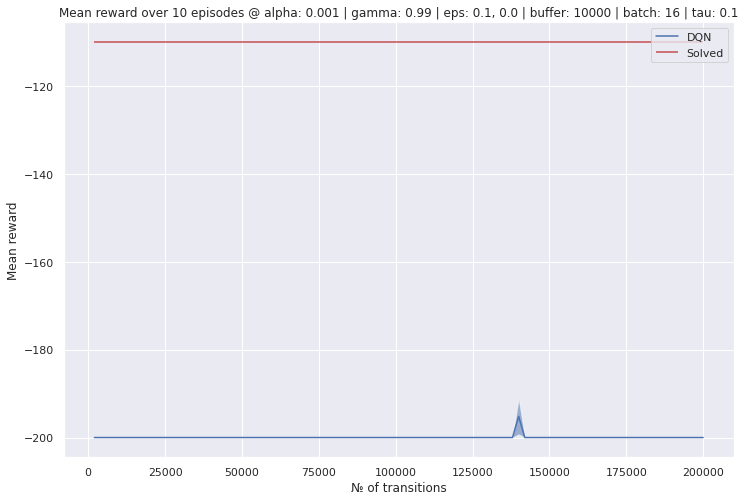

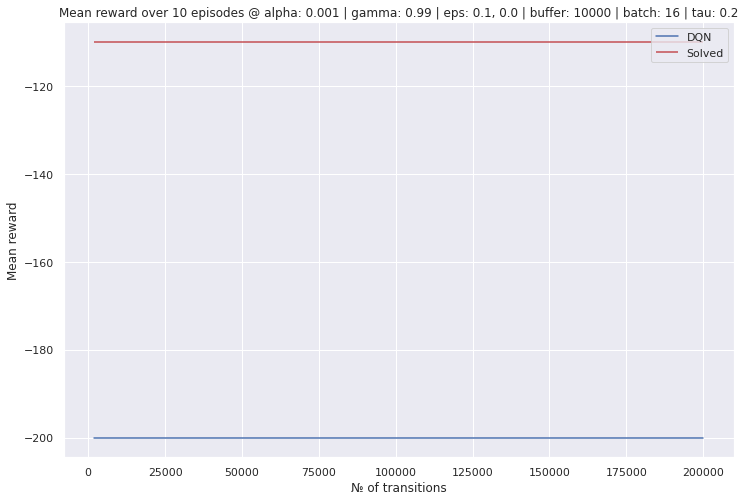

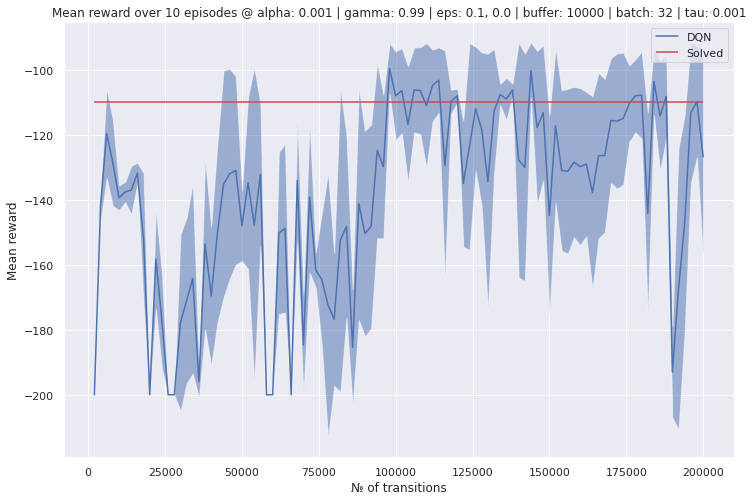

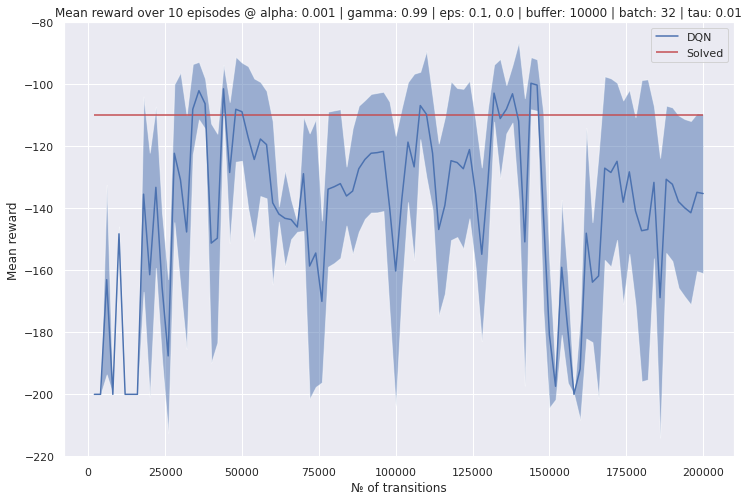

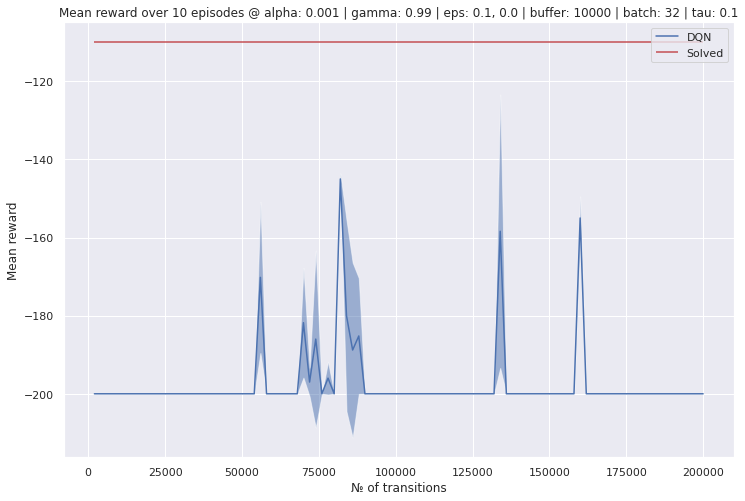

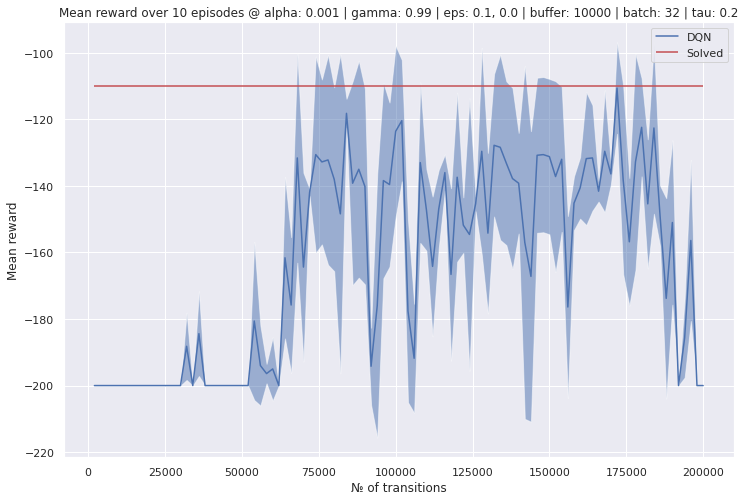

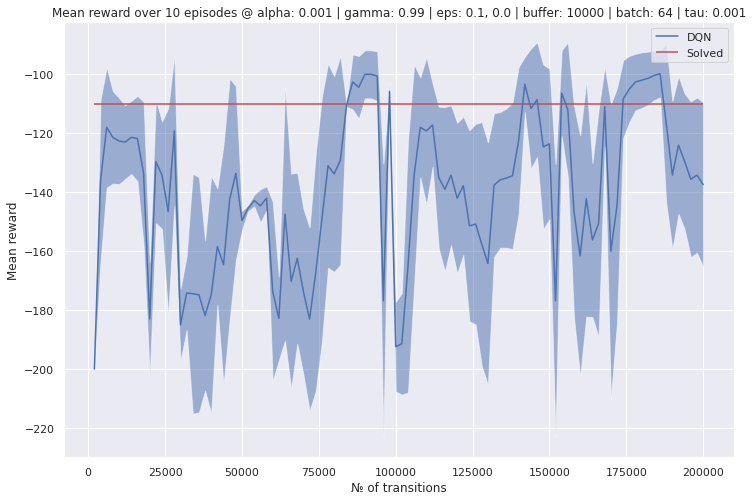

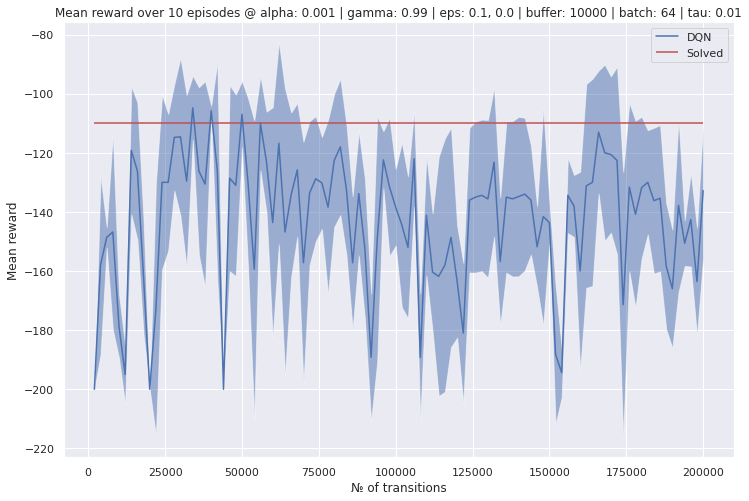

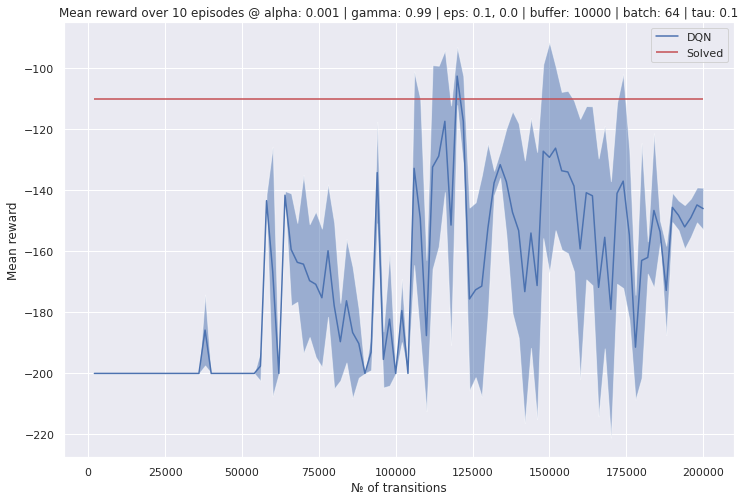

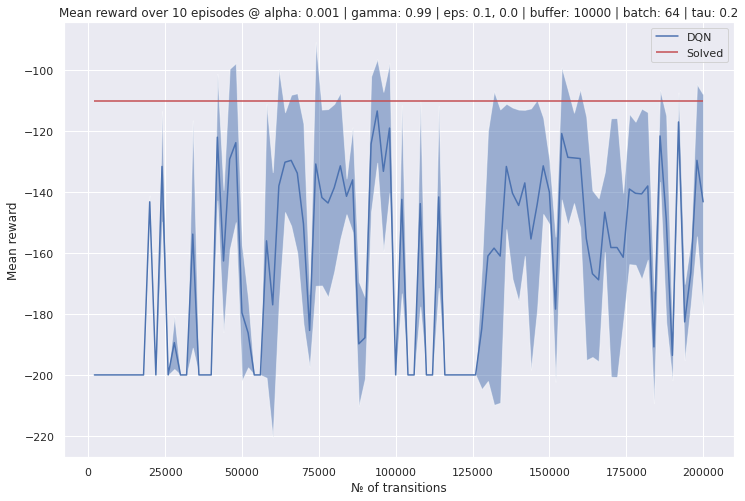

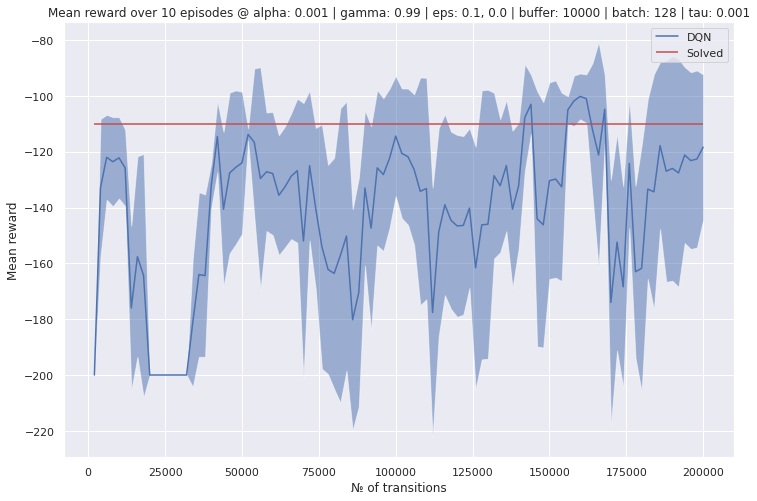

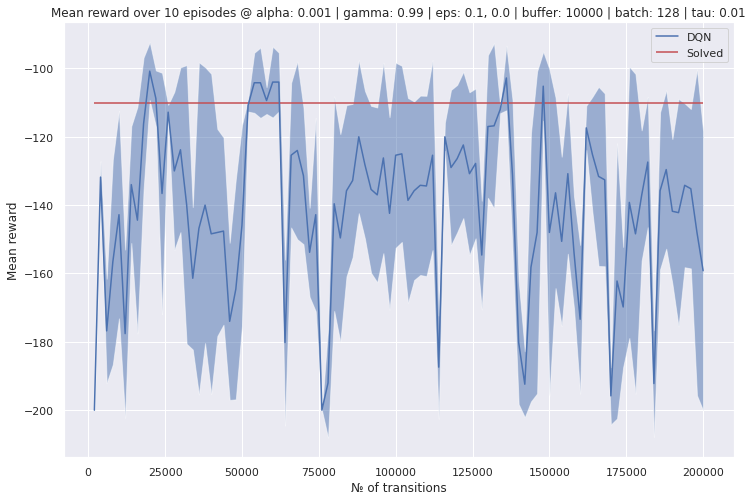

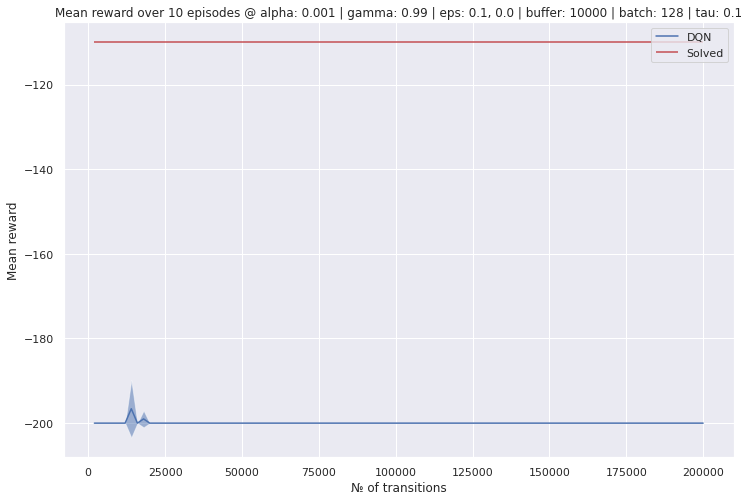

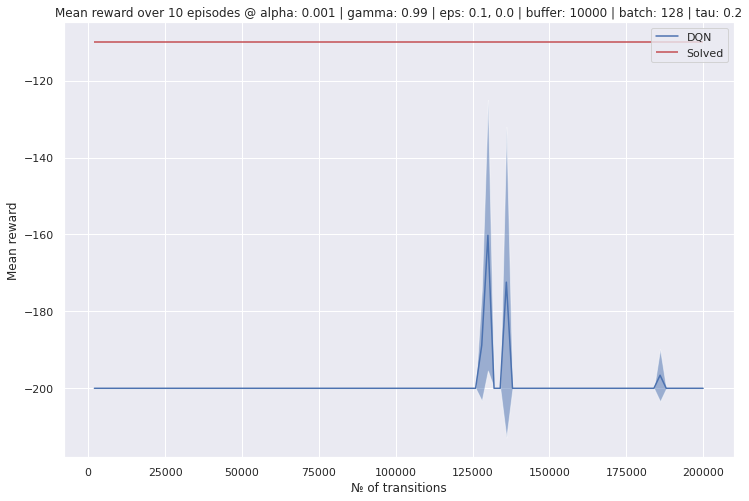

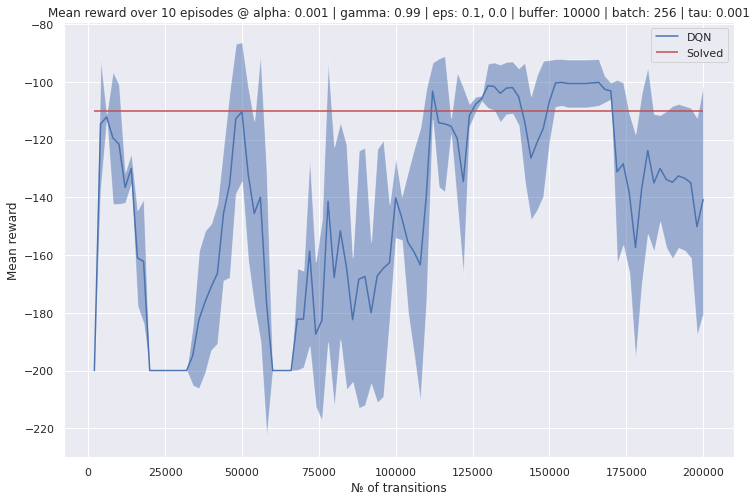

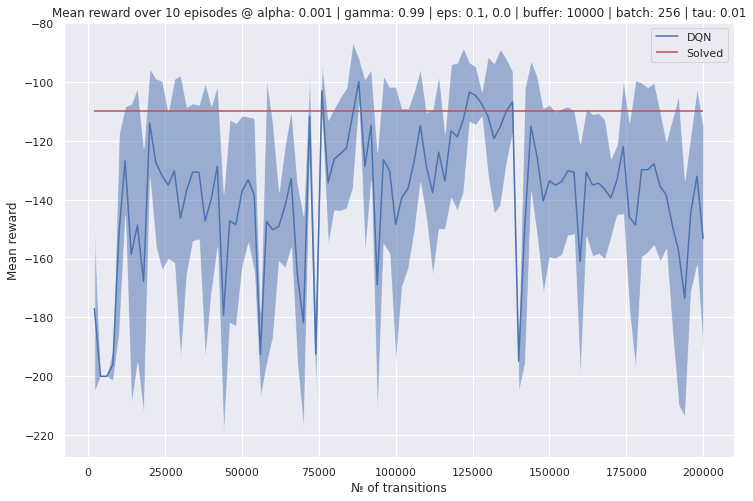

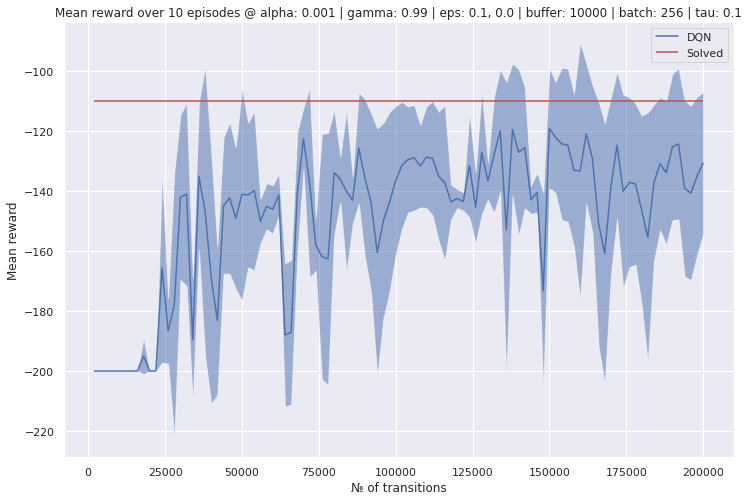

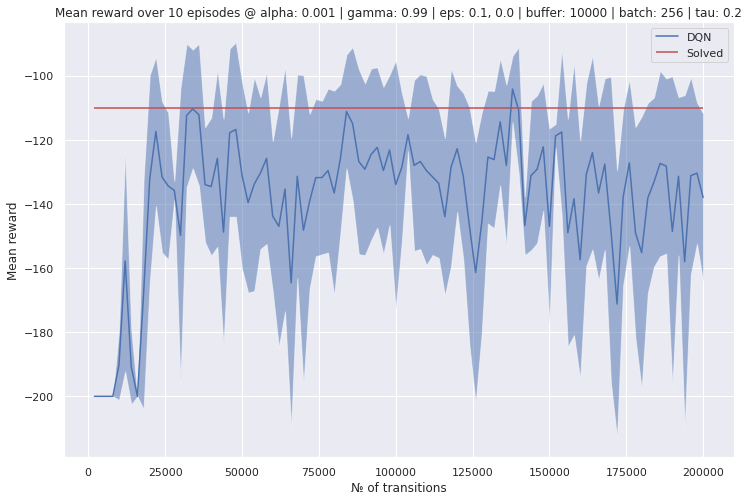

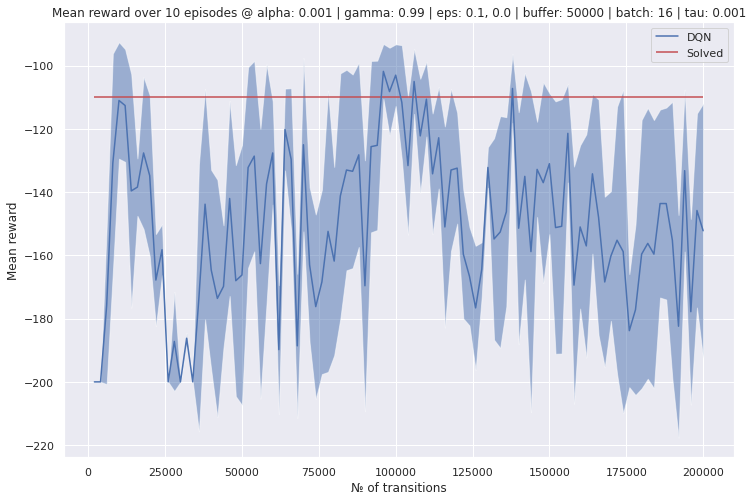

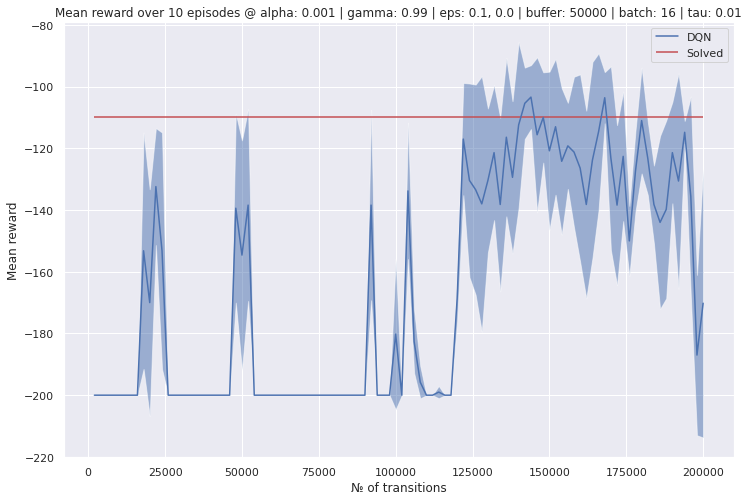

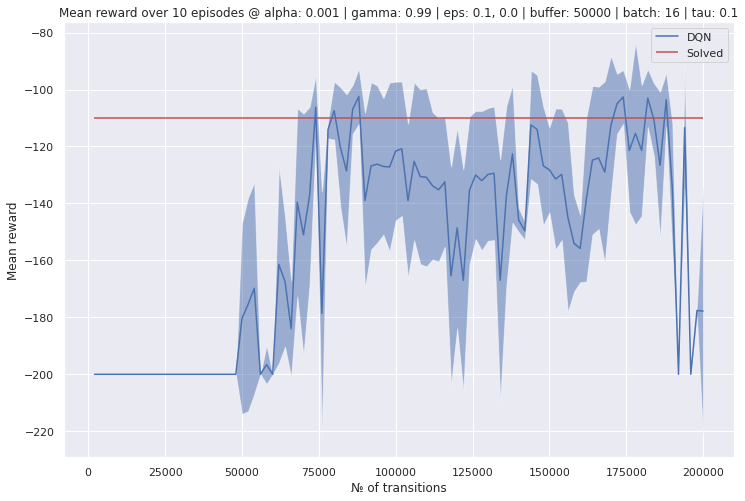

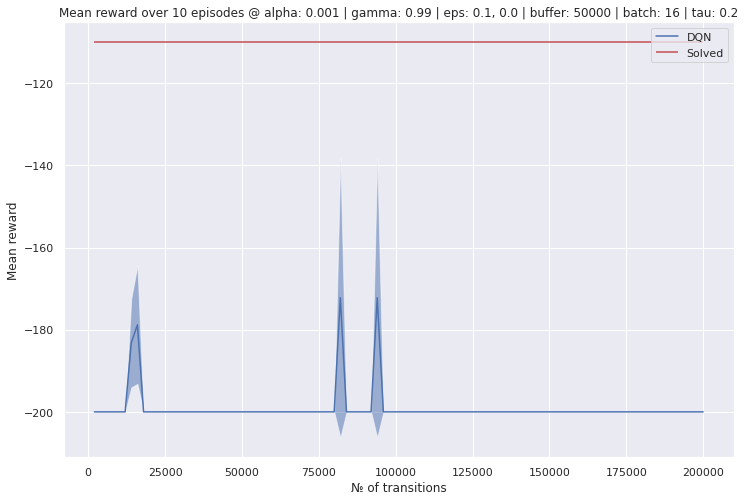

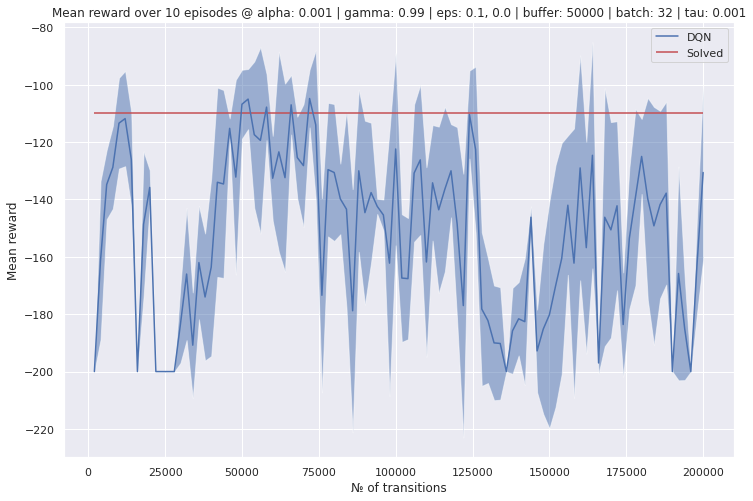

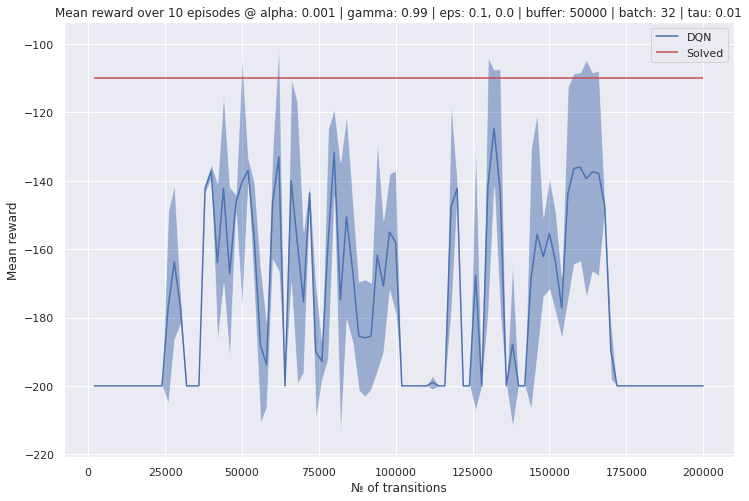

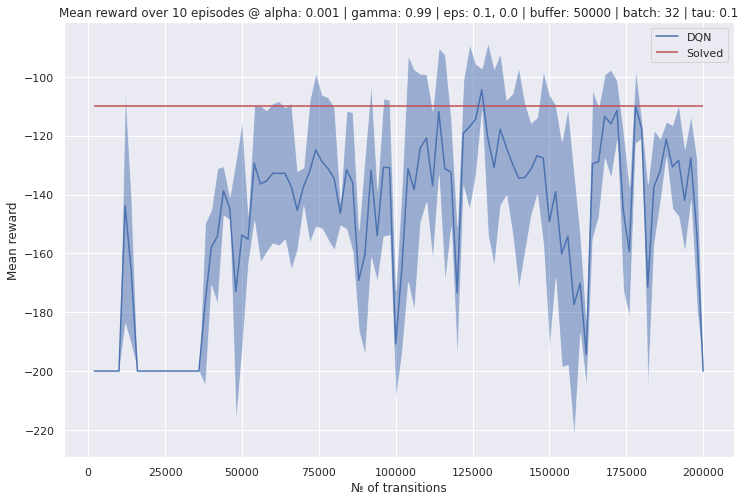

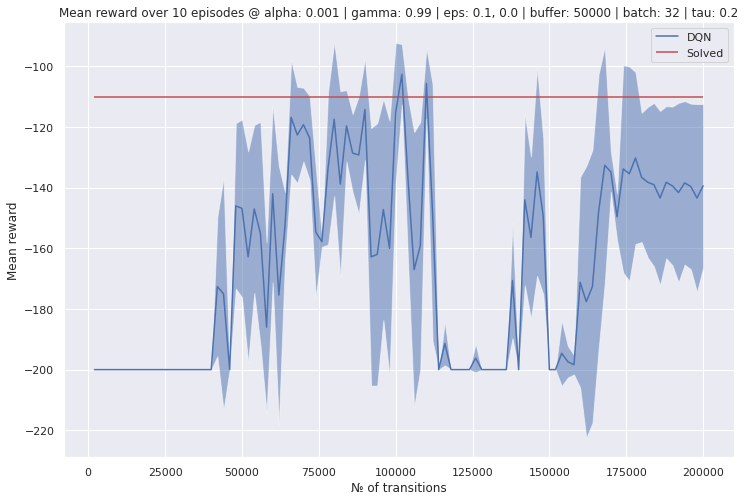

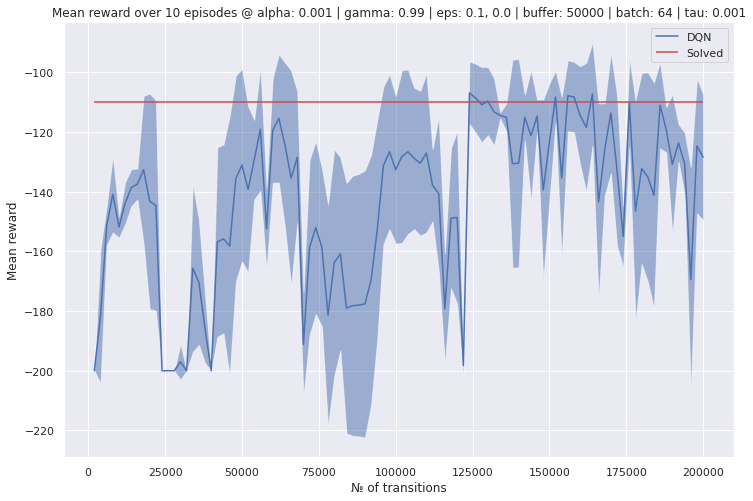

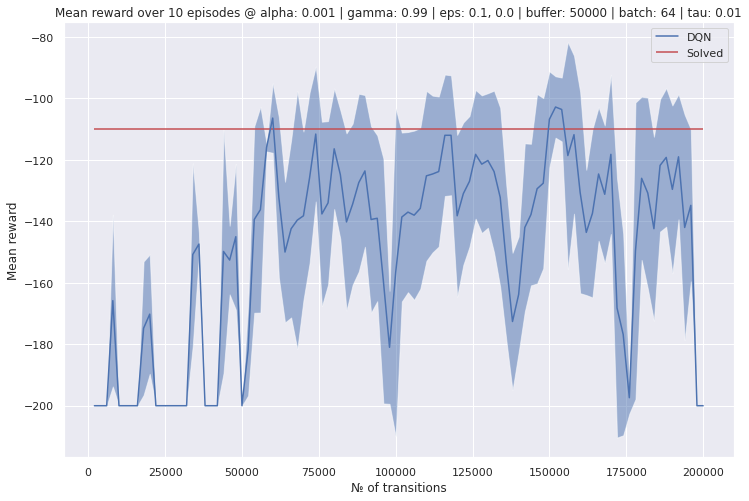

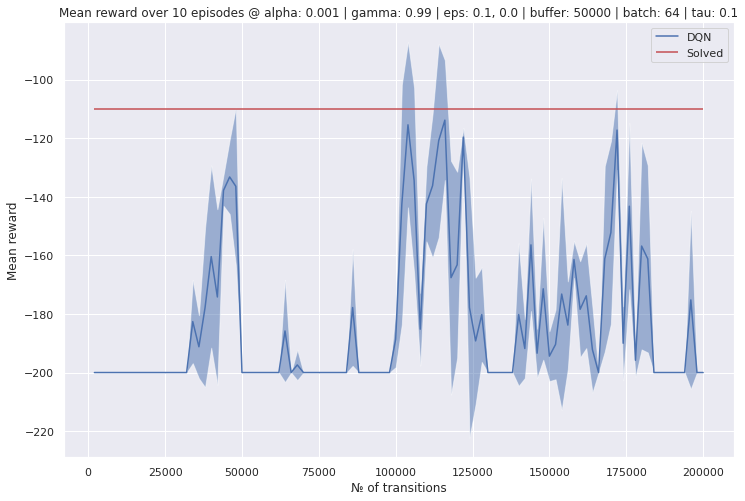

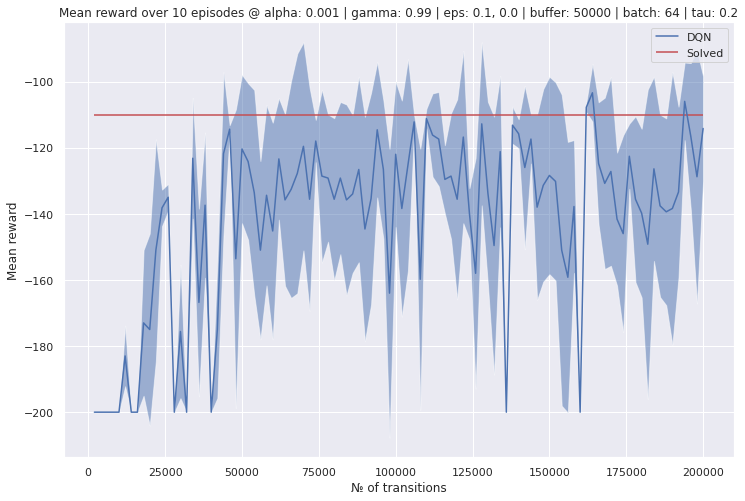

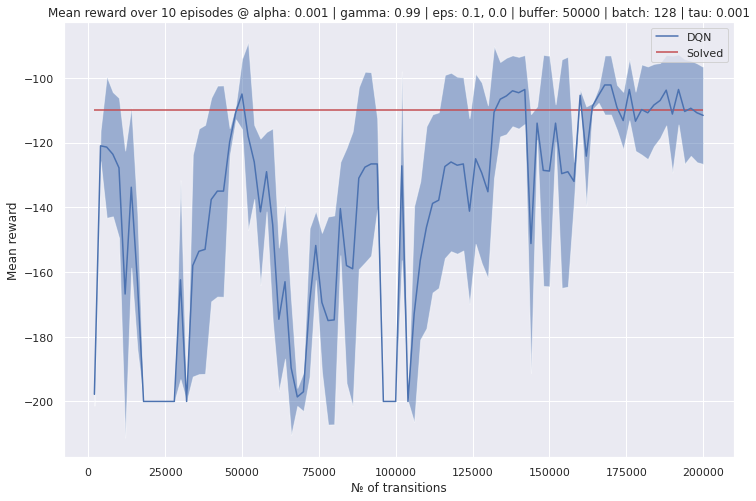

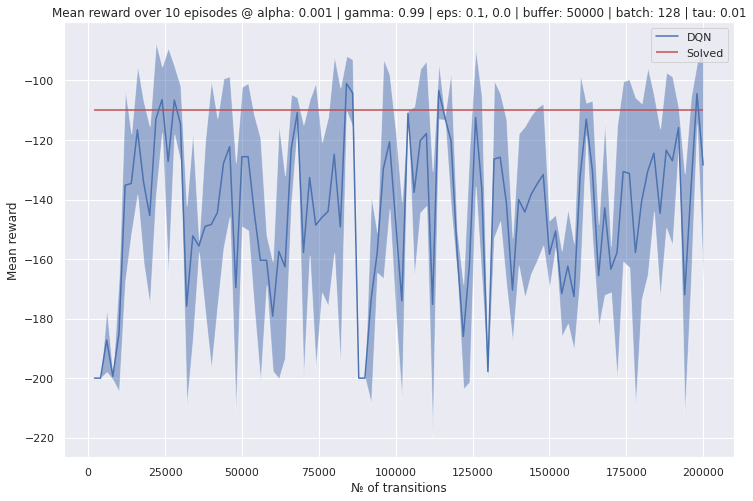

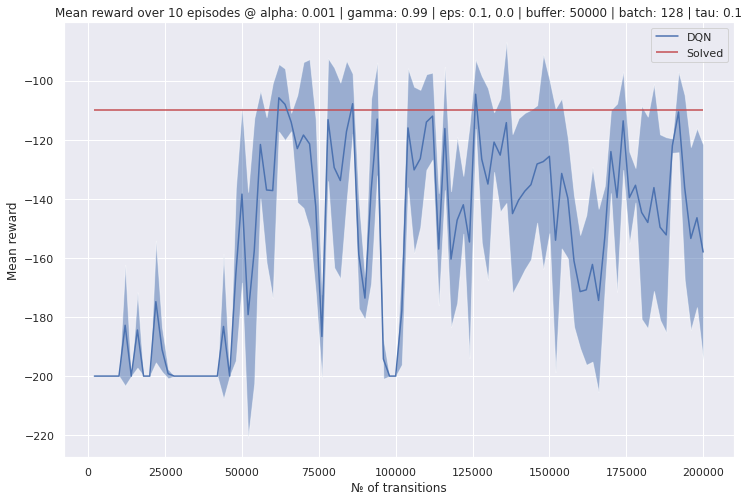

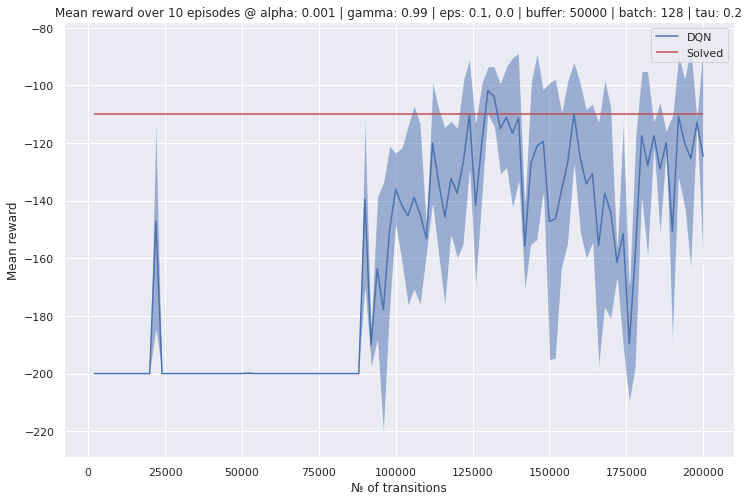

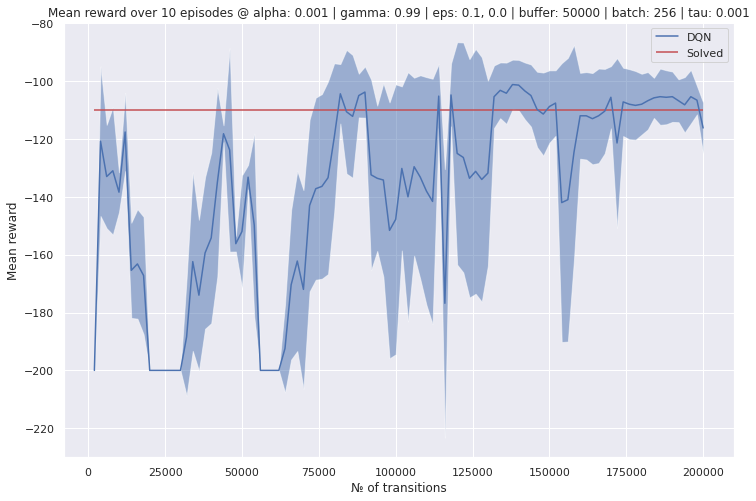

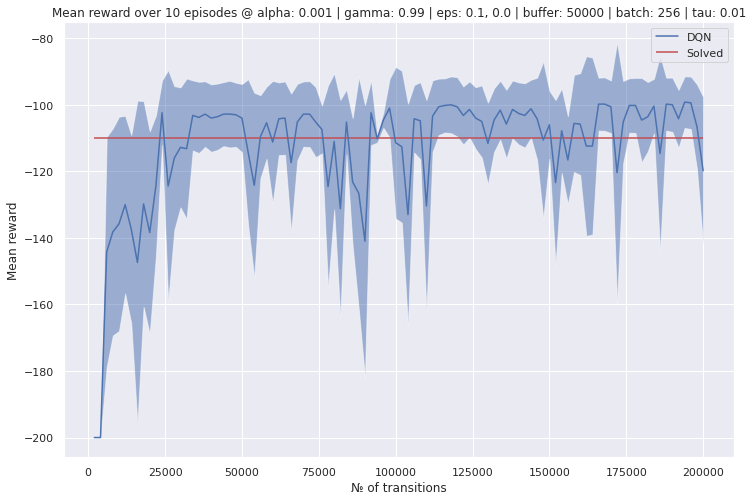

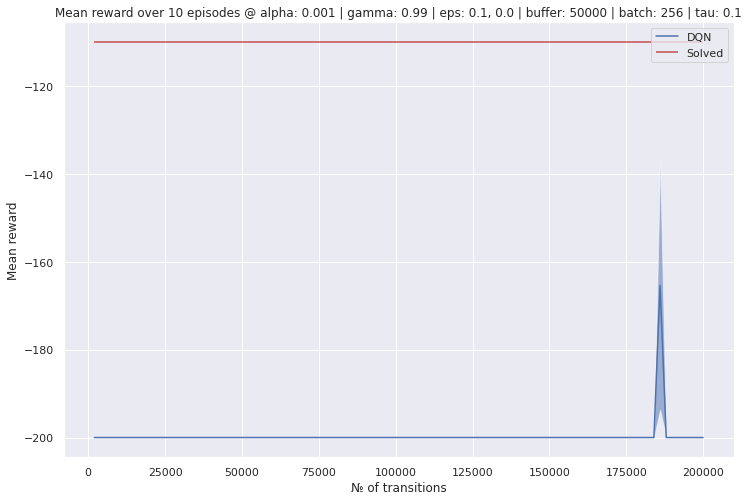

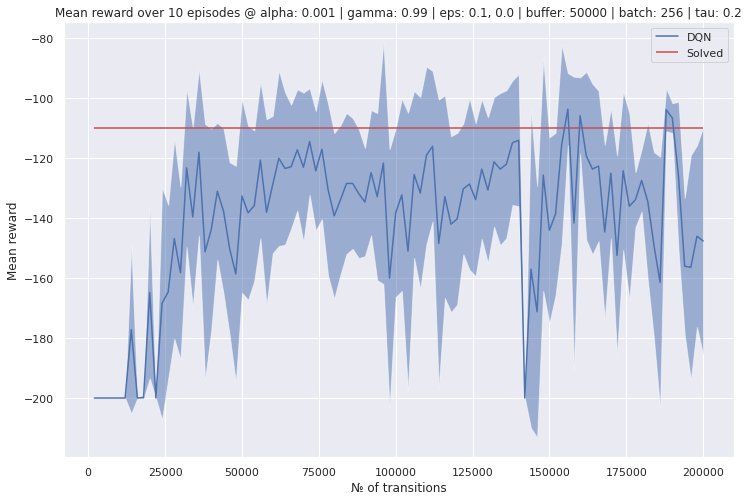

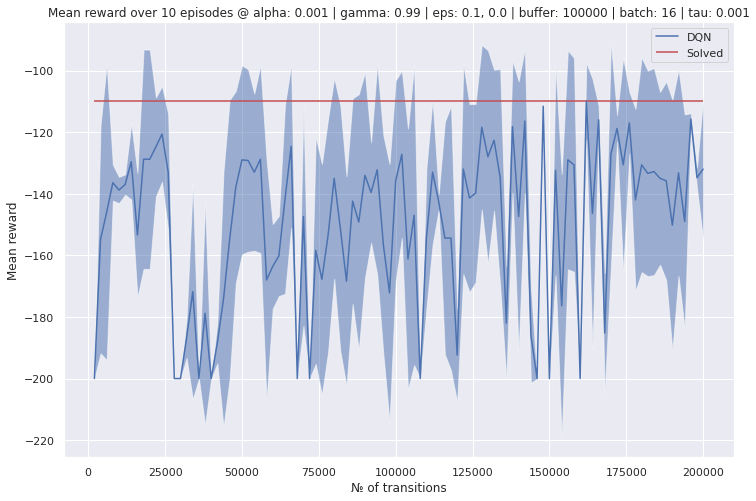

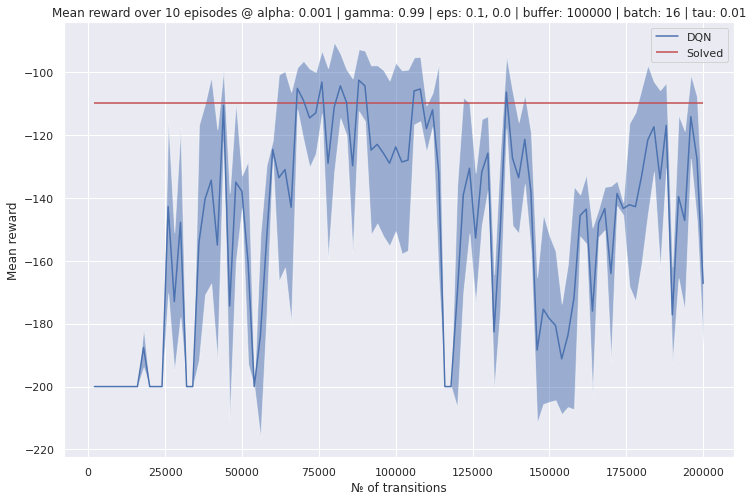

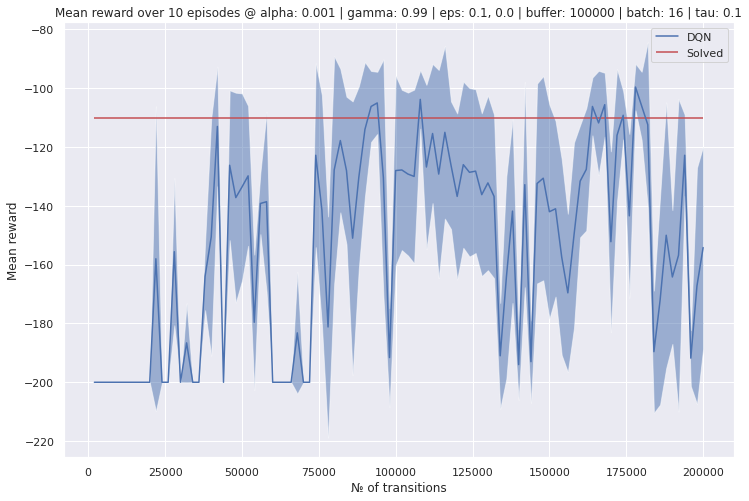

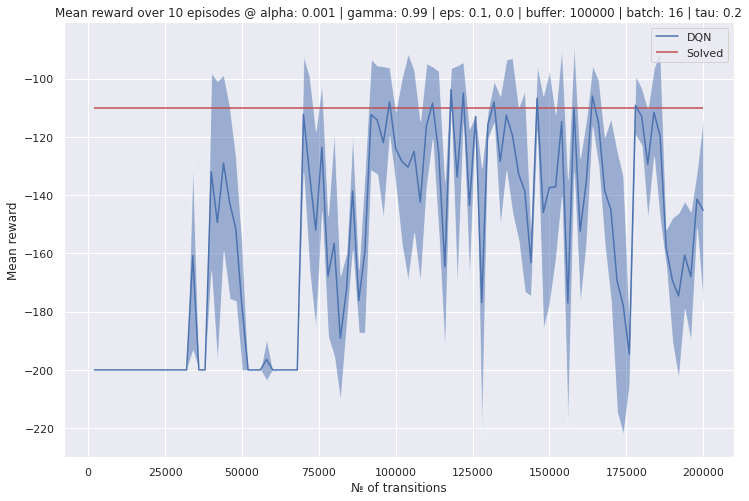

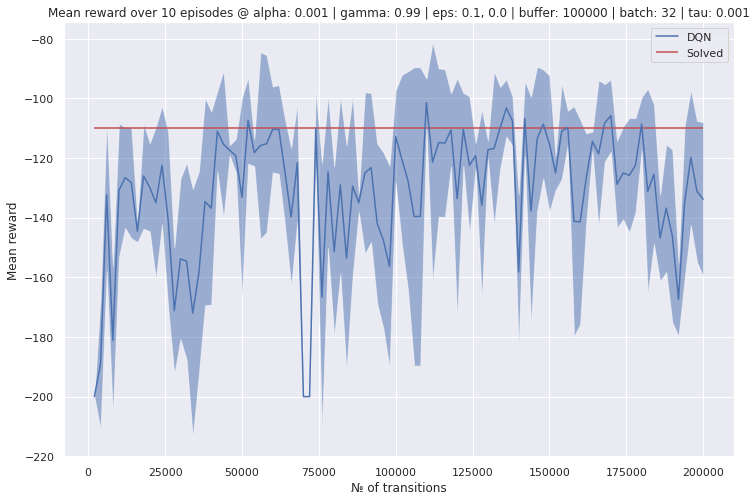

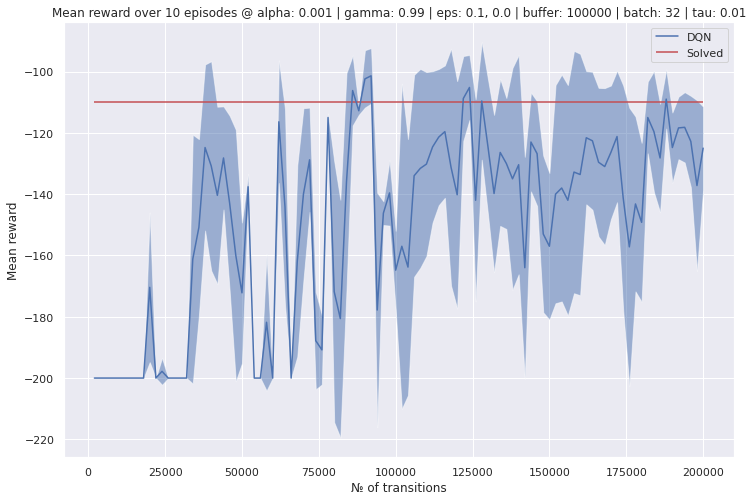

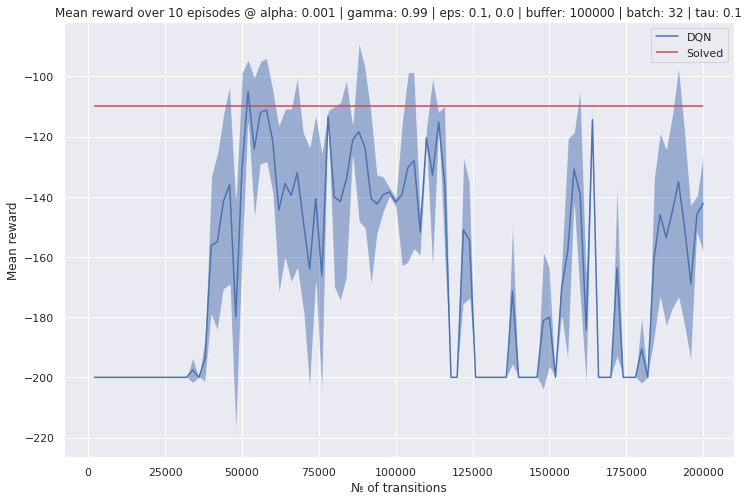

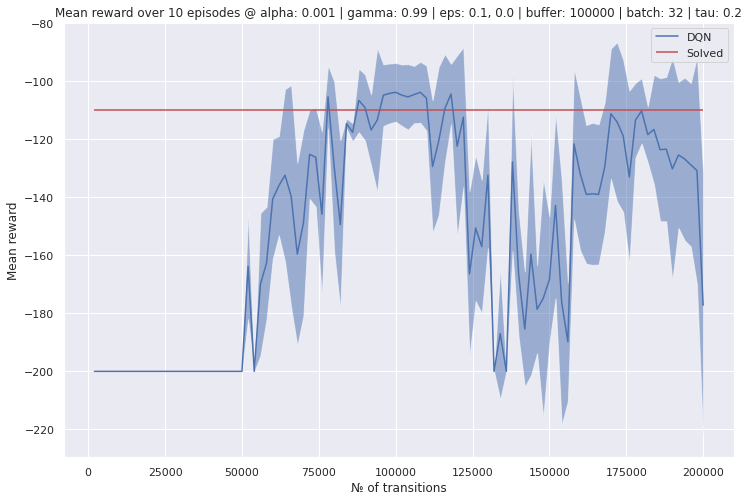

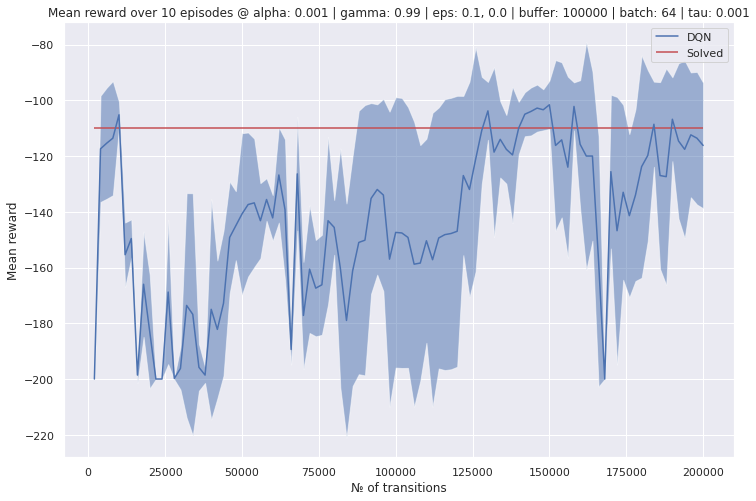

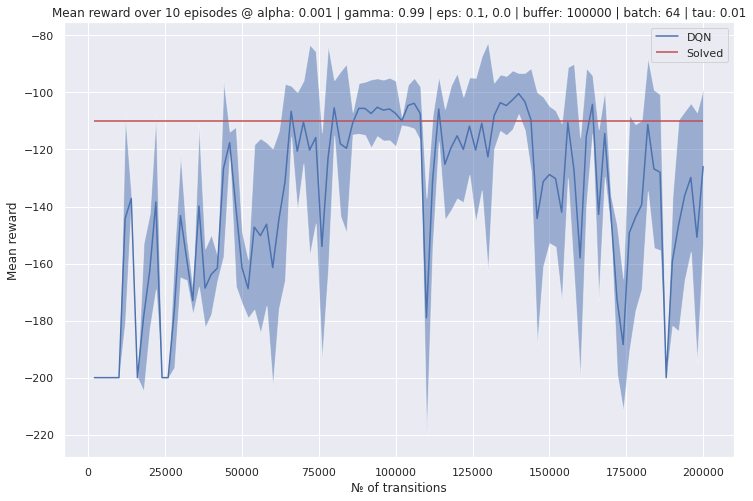

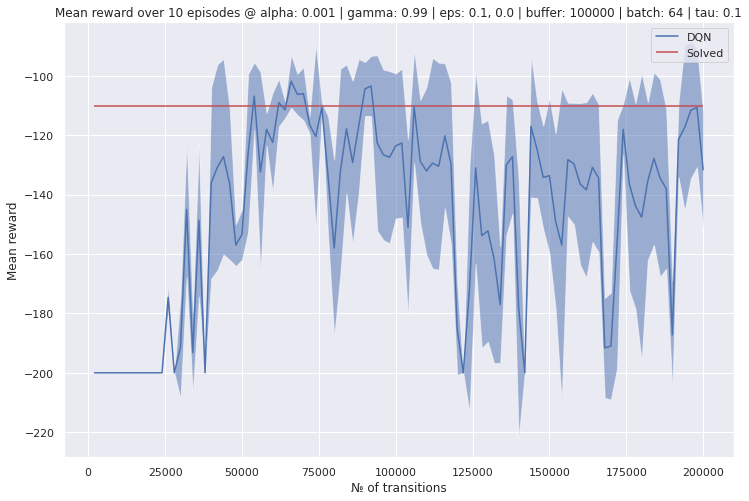

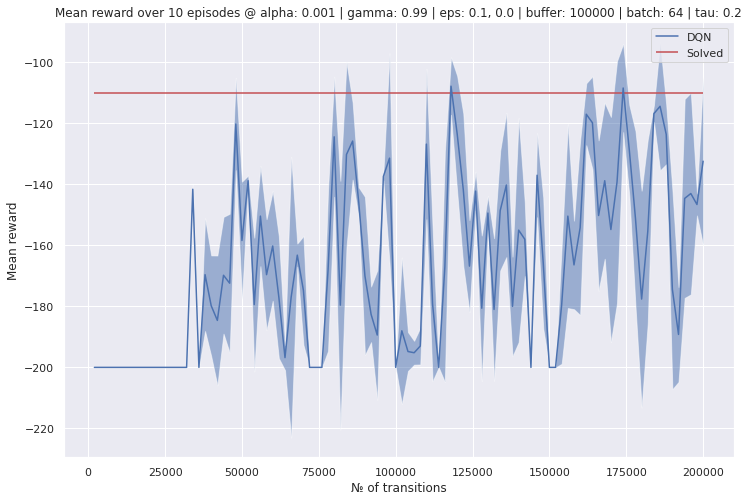

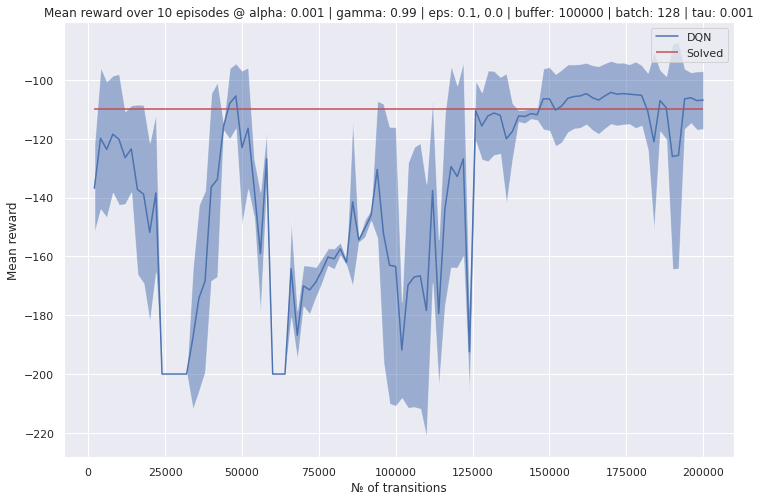

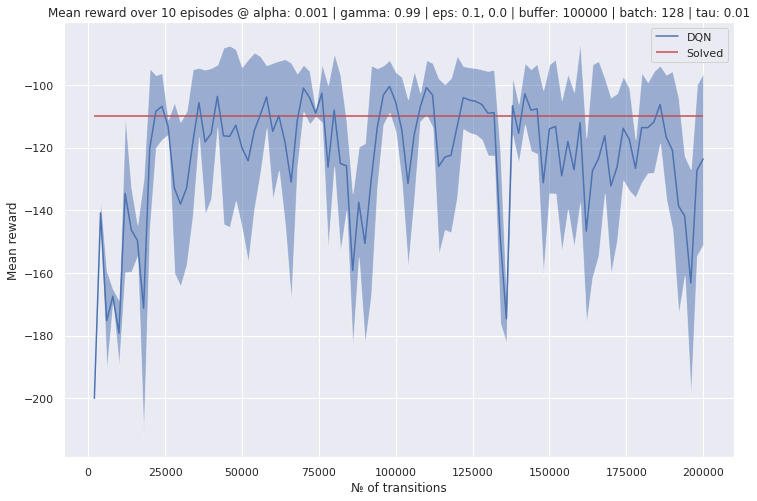

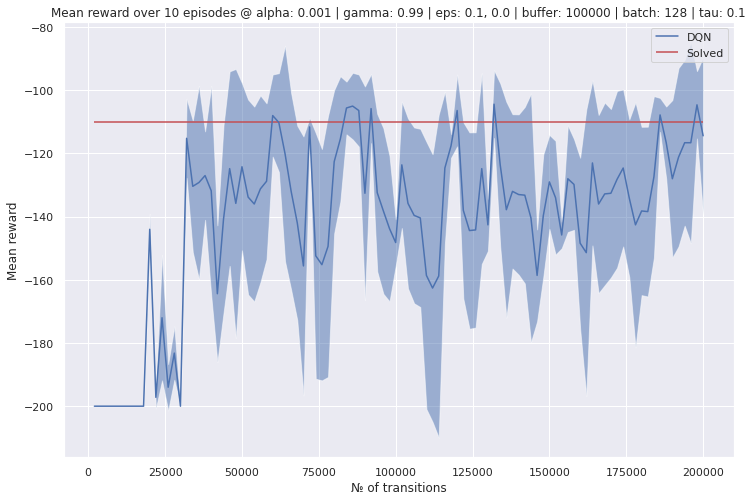

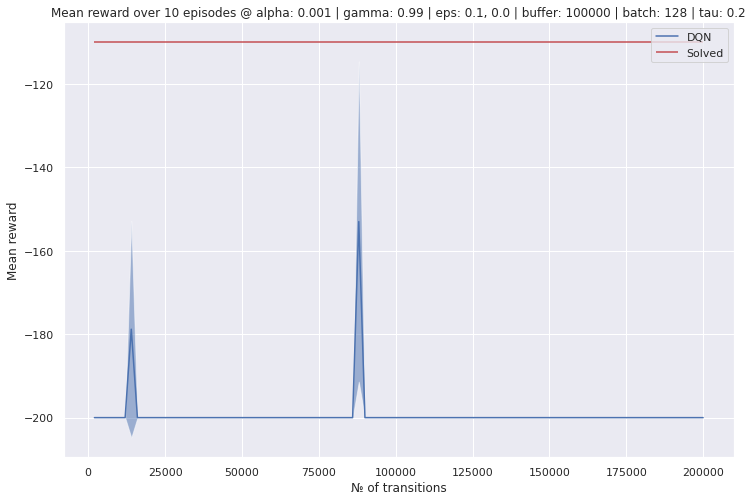

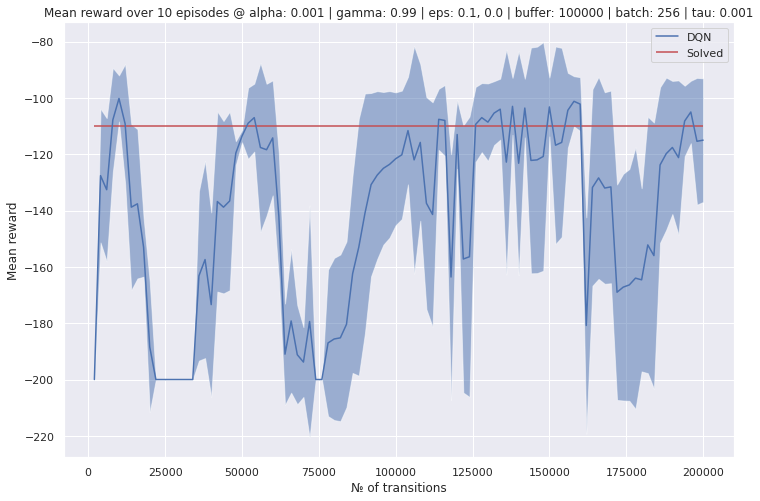

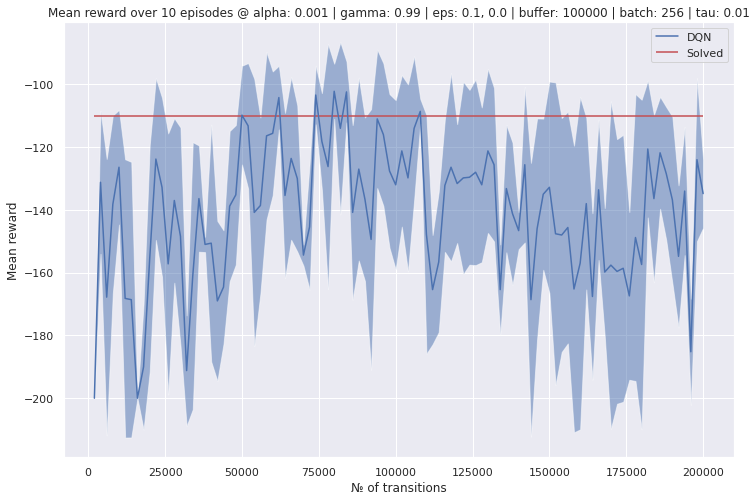

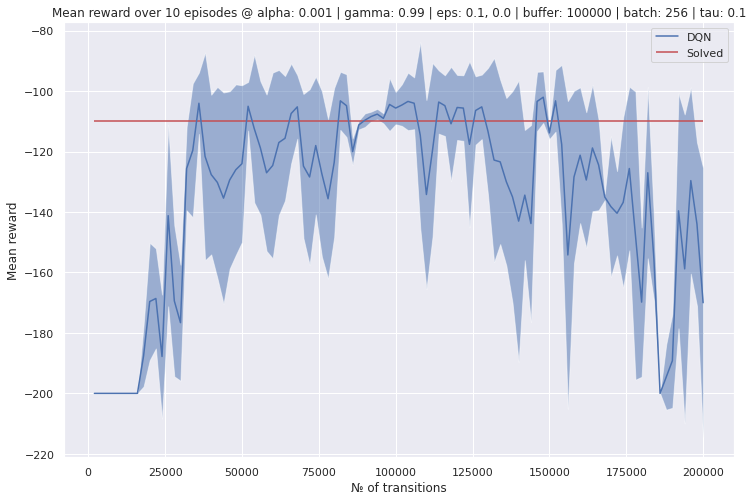

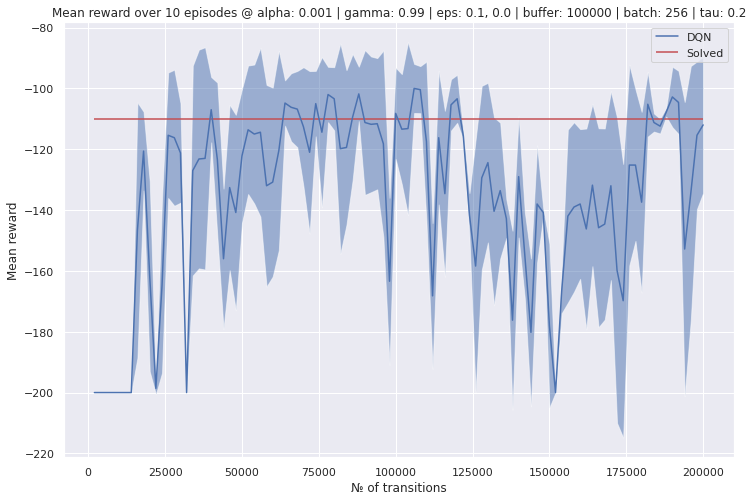

In [4]:
cdd = joblib.delayed(collect_data)
outs = joblib.Parallel(n_jobs=4)(cdd(**config) for config in configs)

for agent, log in outs:
    plot(log)
    print(agent.evaluate_policy(episodes=100))
    print_info(log)

Здесь проведены эксперименты с разными значениями гиперпарамтеров (размера исторического буфера, размера батча и коэффициента примешивания нейронной сети к целевой сети $\tau$)

Дальше субъективно выбраны наиболее интересные наборы гиперпараметров.

step: 200000 | Rmean = -154.0000 | Rstd = 40.7971: 100%|██████████| 200000/200000 [10:41<00:00, 311.82it/s]


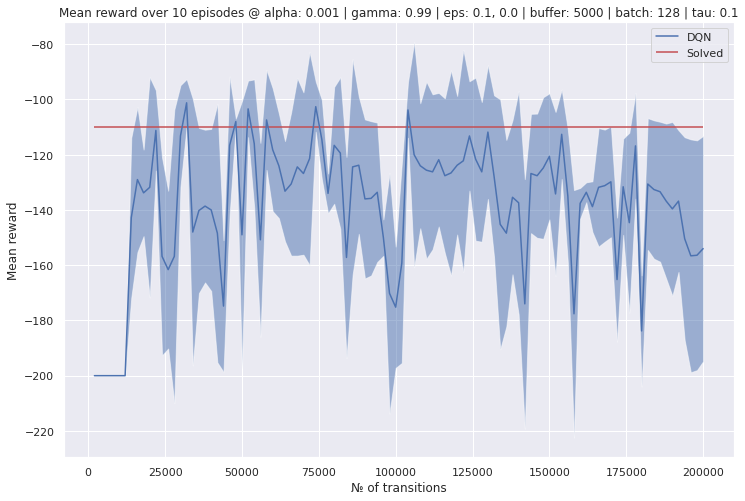

Max mean reward -101.2 @ 31999


(-148.73, 34.99710130853697)

In [10]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 5000,
    "batch_size": 128,
    "start_training": 1000,
    "eps_max": 0.1,
    "eps_min": 0.,
    "hidden_size": 32,
    "shaping": 300,
    "tau": 0.1
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)

Такой набор параметров оказался ненадежным

step: 200000 | Rmean = -140.0000 | Rstd = 34.0000: 100%|██████████| 200000/200000 [10:27<00:00, 318.72it/s]


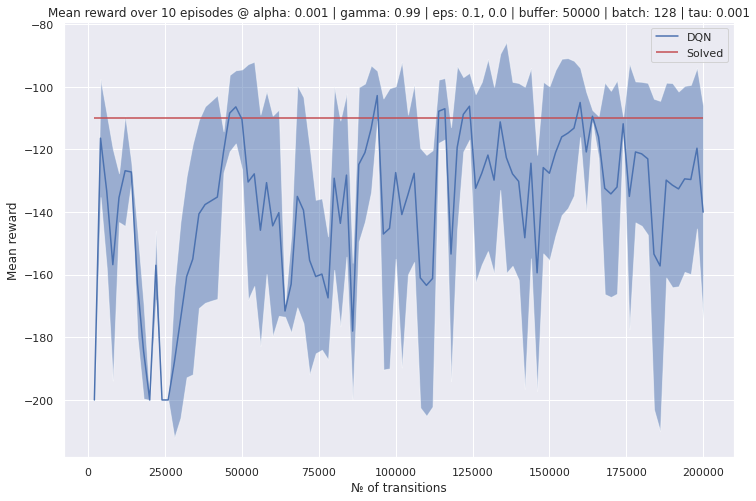

Max mean reward -102.8 @ 93999


(-131.74, 31.66089701824634)

In [11]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 50000,
    "batch_size": 128,
    "start_training": 1000,
    "eps_max": 0.1,
    "eps_min": 0.,
    "hidden_size": 32,
    "shaping": 300,
    "tau": 0.001
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)

Этот набор дает примерно такой же результат, как и предыдущий

step: 200000 | Rmean = -147.8000 | Rstd = 47.6588: 100%|██████████| 200000/200000 [12:45<00:00, 261.10it/s]


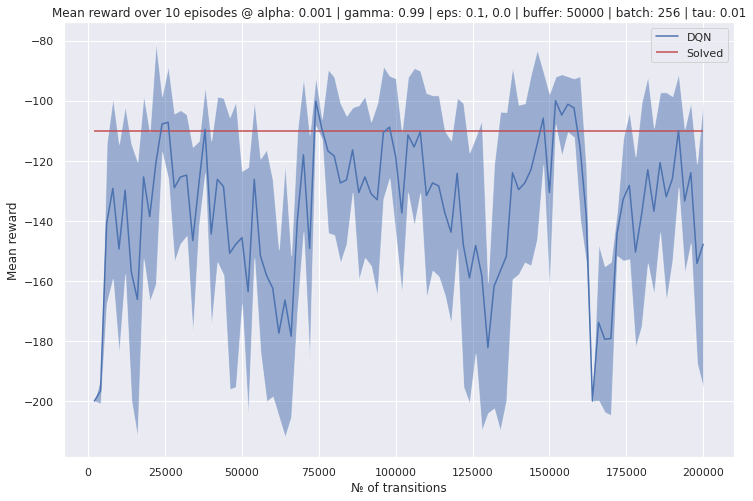

Max mean reward -100.0 @ 151999


(-135.2, 41.6293165929973)

In [7]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 50000,
    "batch_size": 256,
    "start_training": 1000,
    "eps_max": 0.1,
    "eps_min": 0.,
    "hidden_size": 32,
    "shaping": 300,
    "tau": 0.01
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)

step: 200000 | Rmean = -117.2000 | Rstd = 27.9457: 100%|██████████| 200000/200000 [11:13<00:00, 297.03it/s]


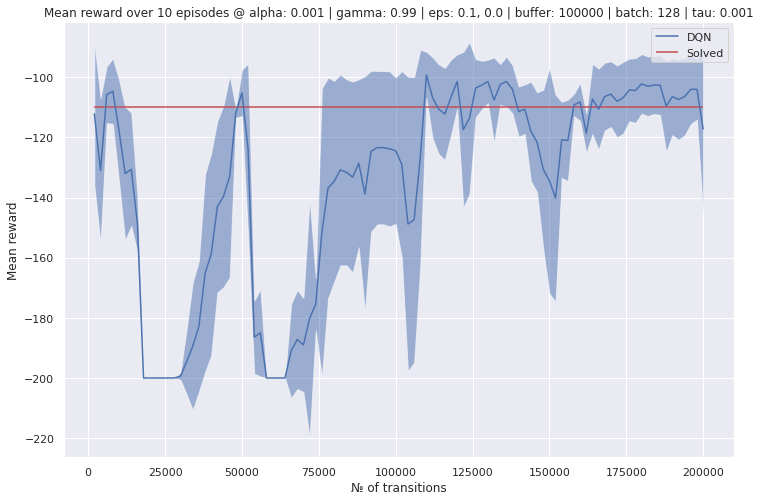

Max mean reward -99.2 @ 109999


(-103.96, 17.38270404741449)

In [8]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 100000,
    "batch_size": 128,
    "start_training": 1000,
    "eps_max": 0.1,
    "eps_min": 0.,
    "hidden_size": 32,
    "shaping": 300,
    "tau": 0.001
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)

А вот это уже хороший набор параметров (повезло?).

В целом есть некий намек на плато после 110000 взаимодействий (что на порядок меньше, чем в Table Q Learning).

step: 200000 | Rmean = -119.0000 | Rstd = 22.5122: 100%|██████████| 200000/200000 [16:15<00:00, 205.03it/s]


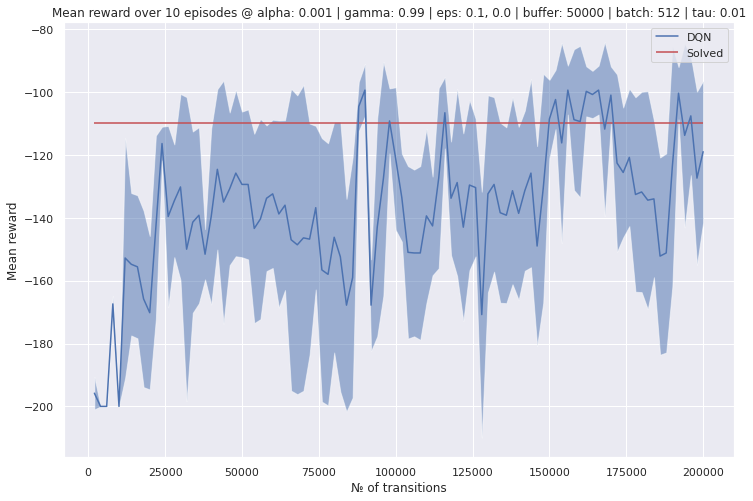

Max mean reward -99.4 @ 89999


(-114.66, 19.515235074167055)

In [9]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 50000,
    "batch_size": 512,
    "start_training": 1000,
    "eps_max": 0.1,
    "eps_min": 0.,
    "hidden_size": 32,
    "shaping": 300,
    "tau": 0.01
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)

Хм, на текущих параметрах агент очень нестабильно обучается.

Варианты решения (?):
* делать [усреднение по значениям Q от таргет-сетки](https://arxiv.org/pdf/1611.01929.pdf)
* накручивать эвристики
* модификации в сторону rainbow.

